In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
data = pd.read_csv("../input/car_selling/training_data.csv")
test = pd.read_csv("../input/car_selling/testing_data.csv")
data.head()

,Deal_num,Buying_Cost,Maintainance_Cost,Number_of_doors,Number_of_Passenger,Luggage_Space,Safety_Features
0,0,low,low,5more,more,big,high
1,1,low,low,2,2,small,high
2,2,low,med,5more,4,med,low
3,3,low,low,4,2,big,low
4,4,low,low,4,2,med,high
...,...,...,...,...,...,...,...
169,169,low,med,4,2,small,low
170,170,low,med,5more,2,small,med
171,171,low,med,5more,more,big,low
172,172,low,high,5more,4,small,low


In [3]:
data.shape

(1554, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Buying_Cost          1554 non-null   object
 1   Maintainance_Cost    1554 non-null   object
 2   Number_of_doors      1554 non-null   object
 3   Number_of_Passenger  1554 non-null   object
 4   Luggage_Space        1554 non-null   object
 5   Safety_Features      1554 non-null   object
 6   How_is_the_deal      1554 non-null   object
dtypes: object(7)
memory usage: 85.1+ KB


No null values

In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.columns = col_names
col_names.remove('class')
test = test.drop('Deal_num',axis =1 )
test.columns = col_names

In [6]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,med,2,4,small,low,Bad_deal
1,vhigh,med,5more,4,small,low,Bad_deal
2,med,vhigh,5more,4,small,low,Bad_deal
3,high,high,3,2,med,med,Bad_deal
4,vhigh,vhigh,5more,4,small,med,Bad_deal


In [7]:
train = data.copy()

In [8]:
train['buying'].unique()

array(['vhigh', 'med', 'high', 'low'], dtype=object)

In [9]:
train['maint'].unique()

array(['med', 'vhigh', 'high', 'low'], dtype=object)

In [10]:
train['doors'].unique()

array(['2', '5more', '3', '4'], dtype=object)

In [11]:
train['persons'].unique()

array(['4', '2', 'more'], dtype=object)

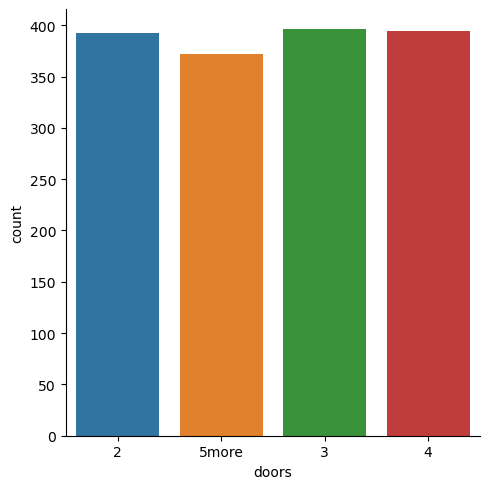

In [12]:
sns.catplot(x='doors', data=train, kind='count');

5more seems to be a probematic value.

In [13]:
train['persons'].unique()

array(['4', '2', 'more'], dtype=object)

In [14]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    print(col)
    print(train[col].value_counts()) 

buying
vhigh    432
med      432
high     432
low      258
Name: buying, dtype: int64
maint
vhigh    432
high     416
med      360
low      346
Name: maint, dtype: int64
doors
3        396
4        394
2        392
5more    372
Name: doors, dtype: int64
persons
4       528
more    524
2       502
Name: persons, dtype: int64
lug_boot
big      524
med      520
small    510
Name: lug_boot, dtype: int64
safety
high    539
med     517
low     498
Name: safety, dtype: int64
class
Bad_deal     1434
Nice_deal     120
Name: class, dtype: int64


In [15]:
y = train['class']
x = train.drop(['class'],axis =1)

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [17]:
x_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [18]:
import category_encoders as ce

In [19]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


x_train = encoder.fit_transform(x_train)

x_test = encoder.transform(x_test)

test = encoder.transform(test)

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [27]:
y_pred_gini = clf_gini.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9443


In [30]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(x_train, y_train)) 

[Text(0.5555555555555556, 0.875, 'X[0] <= 3.5\ngini = 0.127\nsamples = 1087\nvalue = [1013, 74]'),
 Text(0.3333333333333333, 0.625, 'X[0] <= 1.5\ngini = 0.062\nsamples = 913\nvalue = [884, 29]'),
 Text(0.2222222222222222, 0.375, 'X[1] <= 1.5\ngini = 0.173\nsamples = 304\nvalue = [275, 29]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.418\nsamples = 74\nvalue = [52, 22]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.059\nsamples = 230\nvalue = [223, 7]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 609\nvalue = [609, 0]'),
 Text(0.7777777777777778, 0.625, 'X[1] <= 3.5\ngini = 0.383\nsamples = 174\nvalue = [129, 45]'),
 Text(0.6666666666666666, 0.375, 'X[1] <= 1.5\ngini = 0.232\nsamples = 149\nvalue = [129, 20]'),
 Text(0.5555555555555556, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.7777777777777778, 0.125, 'gini = 0.098\nsamples = 136\nvalue = [129, 7]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]')]

In [31]:
y_pred_gini

array(['Bad_deal', 'Nice_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Nice_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Nice_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Nice_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Ba

In [32]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [33]:
y_pred_en = clf_en.predict(x_test)

In [34]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9443


[Text(0.5555555555555556, 0.875, 'X[0] <= 3.5\nentropy = 0.359\nsamples = 1087\nvalue = [1013, 74]'),
 Text(0.3333333333333333, 0.625, 'X[0] <= 1.5\nentropy = 0.203\nsamples = 913\nvalue = [884, 29]'),
 Text(0.2222222222222222, 0.375, 'X[1] <= 1.5\nentropy = 0.454\nsamples = 304\nvalue = [275, 29]'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.878\nsamples = 74\nvalue = [52, 22]'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.197\nsamples = 230\nvalue = [223, 7]'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.0\nsamples = 609\nvalue = [609, 0]'),
 Text(0.7777777777777778, 0.625, 'X[1] <= 3.5\nentropy = 0.825\nsamples = 174\nvalue = [129, 45]'),
 Text(0.6666666666666666, 0.375, 'X[1] <= 1.5\nentropy = 0.569\nsamples = 149\nvalue = [129, 20]'),
 Text(0.5555555555555556, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.7777777777777778, 0.125, 'entropy = 0.293\nsamples = 136\nvalue = [129, 7]'),
 Text(0.8888888888888888, 0.375, 'entropy = 0.0\nsamples = 25\nvalue = [0, 

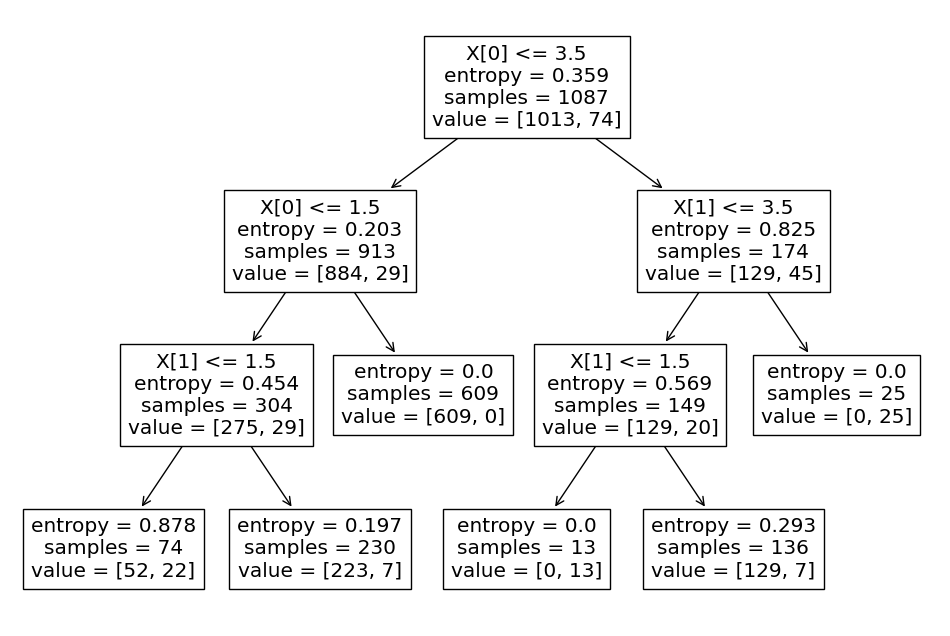

In [28]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(x_train, y_train))

In [30]:
y_pred_en

array(['Bad_deal', 'Nice_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Nice_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Nice_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Nice_deal', 'Bad_deal', 'Bad_deal',
       'Bad_deal', 'Bad_deal', 'Bad_deal', 'Bad_deal', 'Ba

Both gini and entropy decision models seem to produce the same accuracy.